# Descomposición LU: Método Avanzado para Resolver Sistemas de Ecuaciones Lineales

## Descripción y Propósito

La descomposición $LU$ es un método numérico utilizado para factorizar una matriz cuadrada $A$ como el producto de una matriz triangular inferior $L$ y una matriz triangular superior $U$. 

Este método tiene aplicaciones en:

- la resolución de sistemas de ecuaciones lineales, 
- cálculo de determinantes 
- inversión de matrices.

### Ejemplo de Aplicación en Ingeniería

En ingeniería estructural, la descomposición $LU$ se utiliza para analizar el comportamiento de estructuras complejas. 

Por ejemplo, al calcular las deformaciones en un puente bajo diferentes cargas, se puede formular un sistema de ecuaciones lineales que representa las fuerzas y desplazamientos en cada nodo de la estructura:

$$[K]\{u\} = \{F\}$$

Donde $[K]$ es la matriz de rigidez, {$u$} es el vector de desplazamientos nodales, y {$F$} es el vector de fuerzas nodales. 

La descomposición $LU$ permite resolver este sistema, especialmente cuando se necesitan analizar múltiples casos de carga.

---
## Fundamento Matemático

La descomposición $LU$ se basa en la factorización de una matriz $A$ en el producto de dos matrices:

$$ A = LU $$

Donde:

- $L$ es una matriz triangular inferior con 1's en la diagonal principal.
- $U$ es una matriz triangular superior.

Para una matriz 3x3, la descomposición tendría la siguiente forma:


$$ \begin{pmatrix} 
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0 \\
l_{21} & 1 & 0 \\
l_{31} & l_{32} & 1
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33}
\end{pmatrix} $$

### Derivación Matemática

Para entender cómo se obtiene esta descomposición, consideremos el sistema de ecuaciones $A\{X\} = \{B\}$. 

Podemos reescribir este sistema como:

$$[L][U]\{X\} = \{B\}$$

Definiendo un vector intermedio $\{D\}$ tal que $[U]\{X\} = \{D\}$, obtenemos dos ecuaciones:

1. $[L]\{D\} = \{B\}$
2. $[U]\{X\} = \{D\}$

Estas ecuaciones se resuelven en dos pasos:

1. Sustitución hacia adelante para resolver $[L]\{D\} = \{B\}$
2. Sustitución hacia atrás para resolver $[U]\{X\} = \{D\}$



## Desarrollo del Método

El proceso de descomposición LU se realiza de la siguiente manera:

1. Inicializar L como una matriz identidad y U como una matriz de ceros.
2. Para cada fila i de A:

   a. Para j de 1 a i, calcular U[i,j]:
      $$ U_{ij} = A_{ij} - \sum_{k=1}^{i-1} L_{ik}U_{kj} $$

    b. Para j de i+1 a n, calcular L[j,i]:
      $$ L_{ji} = \frac{1}{U_{ii}} (A_{ji} - \sum_{k=1}^{i-1} L_{jk}U_{ki}) $$
      
      
      


### Pseudocódigo

```
función descomposición_LU(A):
    n = número de filas de A
    L = matriz identidad de nxn
    U = matriz de ceros de nxn
    
    para i de 1 a n:
        para j de 1 a i:
            suma = 0
            para k de 1 a j-1:
                suma += L[i,k] * U[k,j]
            U[i,j] = A[i,j] - suma
        
        para j de i+1 a n:
            suma = 0
            para k de 1 a i-1:
                suma += L[j,k] * U[k,i]
            L[j,i] = (A[j,i] - suma) / U[i,i]
    
    retornar L, U
 
```

### Implementación en Python

#### a) Descomposición LU

``` Python
def lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)
    U = np.zeros_like(A)
    
    for i in range(n):
        for j in range(i, n):
            U[i,j] = A[i,j] - np.dot(L[i,:i], U[:i,j])
        for j in range(i+1, n):
            L[j,i] = (A[j,i] - np.dot(L[j,:i], U[:i,i])) / U[i,i]
    
    return L, U

```
#### b) Resolución LU

``` Python
def solve_lu(L, U, b):
    n = L.shape[0]
    y = np.zeros(n)
    x = np.zeros(n)
    
    # Solve Ly = b
    for i in range(n):
        y[i] = b[i] - np.dot(L[i,:i], y[:i])
    
    # Solve Ux = y
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i+1:], x[i+1:])) / U[i,i]
    
    return x
```

### Almacenamiento Eficiente

Una característica importante de la implementación práctica de la descomposición LU es el almacenamiento eficiente de las matrices L y U. En lugar de almacenar L y U por separado, se pueden combinar en una sola matriz:

$$ \begin{pmatrix} 
u_{11} & u_{12} & u_{13} \\
l_{21} & u_{22} & u_{23} \\
l_{31} & l_{32} & u_{33}
\end{pmatrix} $$

Esto es posible porque L tiene unos en la diagonal y ceros encima, mientras que U tiene ceros debajo de la diagonal.

### Manejo del Pivoteo

Para mejorar la estabilidad numérica, especialmente en matrices mal condicionadas, se implementa el pivoteo parcial. Esto implica intercambiar filas para asegurar que el elemento pivote (elemento diagonal) sea el más grande en valor absoluto de su columna. El pivoteo se maneja mediante un vector de orden que registra los intercambios de filas, evitando la necesidad de intercambiar físicamente las filas de la matriz.





	  




## Análisis de Complejidad

La complejidad computacional de la descomposición LU es similar a la de la eliminación de Gauss:

- Fase de descomposición: $O(n^3/3)$ operaciones de multiplicación/división
- Fase de sustitución: $O(n^2)$ operaciones

El total de operaciones es:

$$ \frac{n^3}{3} + O(n^2) $$

Para sistemas grandes, esto se aproxima a $n^3/3$ operaciones.

## Análisis de Error

La descomposición LU es susceptible a errores de redondeo, especialmente en sistemas grandes o mal condicionados. El error puede ser estimado usando el número de condición de la matriz A:

$$ \text{Error relativo} \approx \kappa(A) \cdot \epsilon_\text{machine} $$

donde $\kappa(A)$ es el número de condición de A y $\epsilon_\text{machine}$ es el épsilon de la máquina.


## Ventajas y Desventajas

Ventajas:
- Eficiente para resolver múltiples sistemas con la misma matriz de coeficientes.
- Útil para calcular determinantes e inversas de matrices.
- Almacenamiento eficiente de los factores L y U.

Desventajas:
- Puede ser inestable para matrices mal condicionadas sin pivoteo adecuado.
- Requiere $O(n^2)$ de almacenamiento para la matriz factorizada.

## Ejemplo Numérico

Consideremos el siguiente sistema de ecuaciones:

$$
\begin{aligned}
3x_1 - 0.1x_2 - 0.2x_3 &= 7.85 \\
0.1x_1 + 7x_2 - 0.3x_3 &= -19.3 \\
0.3x_1 - 0.2x_2 + 10x_3 &= 71.4
\end{aligned}
$$

Aplicando la descomposición LU, obtenemos:

$$
L = \begin{pmatrix}
1 & 0 & 0 \\
0.0333333 & 1 & 0 \\
0.1 & -0.0271300 & 1
\end{pmatrix}
$$

$$
U = \begin{pmatrix}
3 & -0.1 & -0.2 \\
0 & 7.00333 & -0.293333 \\
0 & 0 & 10.0120
\end{pmatrix}
$$

Resolviendo $Ly = b$ y luego $Ux = y$, obtenemos la solución:

$$
x_1 = 3, x_2 = -2.5, x_3 = 7.00003
$$






## Ejemplo Práctico: Análisis de Circuitos Eléctricos

Consideremos un circuito eléctrico con tres mallas. Las ecuaciones de malla son:

1. $4I_1 + 3I_2 - I_3 = 6$
2. $-2I_1 - 4I_2 + 5I_3 = 7$
3. $I_1 + 2I_2 + 6I_3 = 8$

Donde $I_1$, $I_2$, e $I_3$ son las corrientes en cada malla.

Resolveremos este sistema usando la descomposición LU:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)
    U = np.zeros_like(A)
    
    for i in range(n):
        for j in range(i, n):
            U[i,j] = A[i,j] - np.dot(L[i,:i], U[:i,j])
        for j in range(i+1, n):
            L[j,i] = (A[j,i] - np.dot(L[j,:i], U[:i,i])) / U[i,i]
    
    return L, U

def solve_lu(L, U, b):
    n = L.shape[0]
    y = np.zeros(n)
    x = np.zeros(n)
    
    # Solve Ly = b
    for i in range(n):
        y[i] = b[i] - np.dot(L[i,:i], y[:i])
    
    # Solve Ux = y
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i+1:], x[i+1:])) / U[i,i]
    
    return x

# Ejemplo de uso
A = np.array([[4, 3, -1], [-2, -4, 5], [1, 2, 6]])
b = np.array([6, 7, 8])

L, U = lu_decomposition(A)
x = solve_lu(L, U, b)

print("Matriz L:")
print(L)
print("\nMatriz U:")
print(U)
print("\nSolución x:")
print(x)
print("\nVerificación A*x:")
print(np.dot(A, x))

Matriz L:
[[ 1.     0.     0.   ]
 [-0.5    1.     0.   ]
 [ 0.25  -0.625  1.   ]]

Matriz U:
[[ 4  3 -1]
 [ 0 -2  4]
 [ 0  0  8]]

Solución x:
[ 3.2578125 -1.8125     1.59375  ]

Verificación A*x:
[6.        8.703125  9.1953125]


Corrientes de malla:
I1 = 3.2578 A
I2 = -1.8125 A
I3 = 1.5938 A


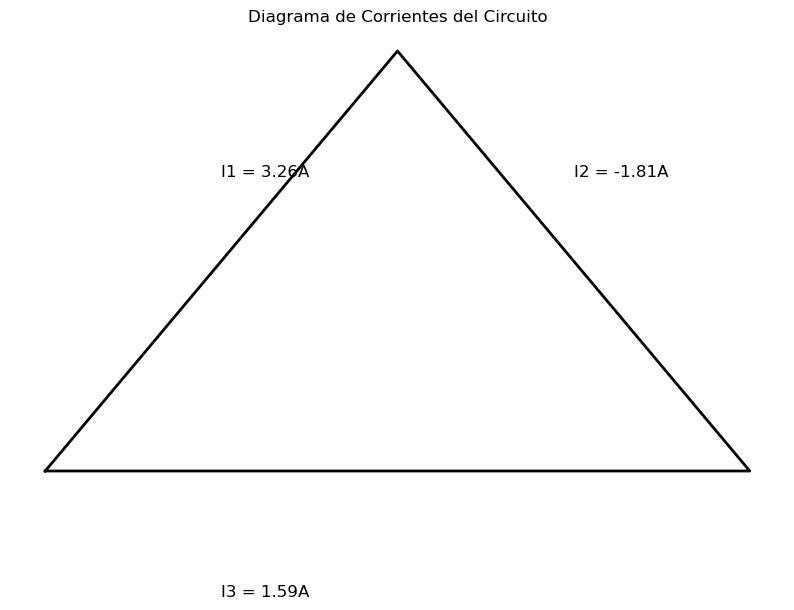

In [3]:
# Definir el sistema
A = np.array([[4, 3, -1], [-2, -4, 5], [1, 2, 6]])
b = np.array([6, 7, 8])

# Realizar la descomposición LU y resolver
L, U = lu_decomposition(A)
I = solve_lu(L, U, b)

print("Corrientes de malla:")
print(f"I1 = {I[0]:.4f} A")
print(f"I2 = {I[1]:.4f} A")
print(f"I3 = {I[2]:.4f} A")

# Visualización del circuito
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 0], [0, 1, 0, 0], 'k-', linewidth=2)
plt.text(0.5, 0.7, f'I1 = {I[0]:.2f}A', fontsize=12)
plt.text(1.5, 0.7, f'I2 = {I[1]:.2f}A', fontsize=12)
plt.text(0.5, -0.3, f'I3 = {I[2]:.2f}A', fontsize=12)
plt.title('Diagrama de Corrientes del Circuito')
plt.axis('off')
plt.show()

Este código resuelve el sistema y genera una visualización simple del circuito con las corrientes calculadas.


## Ejercicios Propuestos

1. Implemente la descomposición LU con pivoteo parcial en Python y pruébela con el sistema de ecuaciones del ejemplo numérico.

2. Compare el tiempo de ejecución de la descomposición LU con la eliminación de Gauss para sistemas de diferentes tamaños (por ejemplo, n = 10, 100, 1000).

3. Utilice la descomposición LU para calcular el determinante de una matriz 4x4. (Pista: el determinante es el producto de los elementos diagonales de U multiplicado por (-1)^p, donde p es el número de intercambios de filas durante el pivoteo).

4. (Pensamiento crítico) Discuta las implicaciones de usar aritmética de precisión finita en la implementación de la descomposición LU. ¿Cómo afecta esto a la estabilidad y precisión del método?

## Conclusión

La descomposición LU es una técnica poderosa en álgebra lineal numérica con aplicaciones cruciales en ingeniería. Ofrece una manera eficiente de resolver sistemas de ecuaciones lineales, especialmente cuando se necesita resolver múltiples sistemas con la misma matriz de coeficientes. La implementación con pivoteo parcial mejora significativamente la estabilidad numérica, haciendo que este método sea robusto incluso para matrices mal condicionadas.

En la práctica de la ingeniería, la descomposición LU se utiliza en una amplia gama de aplicaciones, desde el análisis de circuitos eléctricos hasta la simulación de estructuras complejas. Su eficiencia computacional la hace particularmente útil en problemas de gran escala donde la velocidad de cálculo es crucial.

## Referencias y Recursos Adicionales

1. Golub, G. H., & Van Loan, C. F. (2013). Matrix Computations (4th ed.). Johns Hopkins University Press.
2. Trefethen, L. N., & Bau III, D. (1997). Numerical Linear Algebra. SIAM.
3. Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge University Press.
4. Burden, R. L., & Faires, J. D. (2010). Numerical Analysis (9th ed.). Brooks/Cole.
5. NumPy documentation: [Linear Algebra (numpy.linalg)](https://numpy.org/doc/stable/reference/routines.linalg.html)
6. SciPy Lectures: [Linear Algebra](https://scipy-lectures.org/intro/numpy/operations.html#linear-algebra)

Para profundizar en el tema, se recomienda explorar:
- Métodos de factorización de matrices (Cholesky, QR)
- Aplicaciones en análisis de elementos finitos
- Optimización de algoritmos de descomposición LU para sistemas de gran escala y computación paralela



## Anexos: Algoritmo Detallado

A continuación, se presenta un pseudocódigo detallado para la implementación de la descomposición LU con pivoteo parcial:

```
SUB Ludecomp (a, b, n, tol, x, er)
    DIM o[n], s[n]
    er = 0
    CALL Decompose(a, n, tol, o, s, er)
    IF er <> -1 THEN
        CALL Substitute(a, o, n, b, x)
    END IF
END Ludecomp

SUB Decompose (a, n, tol, o, s, er)
    FOR i = 1 TO n
        o[i] = i
        s[i] = ABS(a[i,1])
        FOR j = 2 TO n
            IF ABS(a[i,j]) > s[i] THEN s[i] = ABS(a[i,j])
        END FOR
    END FOR
    
    FOR k = 1 TO n - 1
        CALL Pivot(a, o, s, n, k)
        IF ABS(a[o[k],k] / s[o[k]]) < tol THEN
            er = -1
            EXIT FOR
        END IF
        
        FOR i = k + 1 TO n
            factor = a[o[i],k] / a[o[k],k]
            a[o[i],k] = factor
            FOR j = k + 1 TO n
                a[o[i],j] = a[o[i],j] - factor * a[o[k],j]
            END FOR
        END FOR
    END FOR
    
    IF ABS(a[o[n],n] / s[o[n]]) < tol THEN er = -1
END Decompose

SUB Pivot(a, o, s, n, k)
    p = k
    big = ABS(a[o[k],k] / s[o[k]])
    FOR ii = k + 1 TO n
        dummy = ABS(a[o[ii],k] / s[o[ii]])
        IF dummy > big THEN
            big = dummy
            p = ii
        END IF
    END FOR
    dummy = o[p]
    o[p] = o[k]
    o[k] = dummy
END Pivot

SUB Substitute (a, o, n, b, x)
    FOR i = 2 TO n
        sum = b[o[i]]
        FOR j = 1 TO i - 1
            sum = sum - a[o[i],j] * b[o[j]]
        END FOR
        b[o[i]] = sum
    END FOR
    
    x[n] = b[o[n]] / a[o[n],n]
    FOR i = n - 1 TO 1 STEP -1
        sum = 0
        FOR j = i + 1 TO n
            sum = sum + a[o[i],j] * x[j]
        END FOR
        x[i] = (b[o[i]] - sum) / a[o[i],i]
    END FOR
END Substitute
```

Este algoritmo incluye manejo de pivoteo y detección de sistemas singulares o mal condicionados.